In [1]:
import xarray as xr
import dask
import numpy as np
import pandas as pd

In [2]:
#loop to load in data
for i, year in enumerate(range(1983, 2010)):
    if year == 1983:
        date = pd.date_range(str(year)+"-07-01",freq="M", periods=6)#first file is only jul-dec, so make exeption for dates
    else:
        date = pd.date_range(str(year)+"-01-01",freq="M", periods=12)#converting to proper datetime from 1-12
    DS = xr.open_mfdataset('/home/z5113258/Documents/data/OAFlux/netheat_1983-2009/qnet_'+str(year)+'.nc',
                         decode_times=False, parallel=True)#load in Dataset
    DS['time'] = date#change time to datetime
    if i ==0:
        DS1 = DS
    else:
        DS1 = xr.concat([DS1, DS], dim = 'time')#creating one dataset

In [3]:
qnet = DS1.qnet

In [4]:
qnet = qnet.groupby('time.month').mean('time')

In [5]:
qnet = qnet.sel(lat=slice(-40,30),lon=slice(30,125))

In [ ]:
qnet.to_netcdf('/home/z5113258/Documents/data/OAFlux/OAflux_qnet.nc')

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


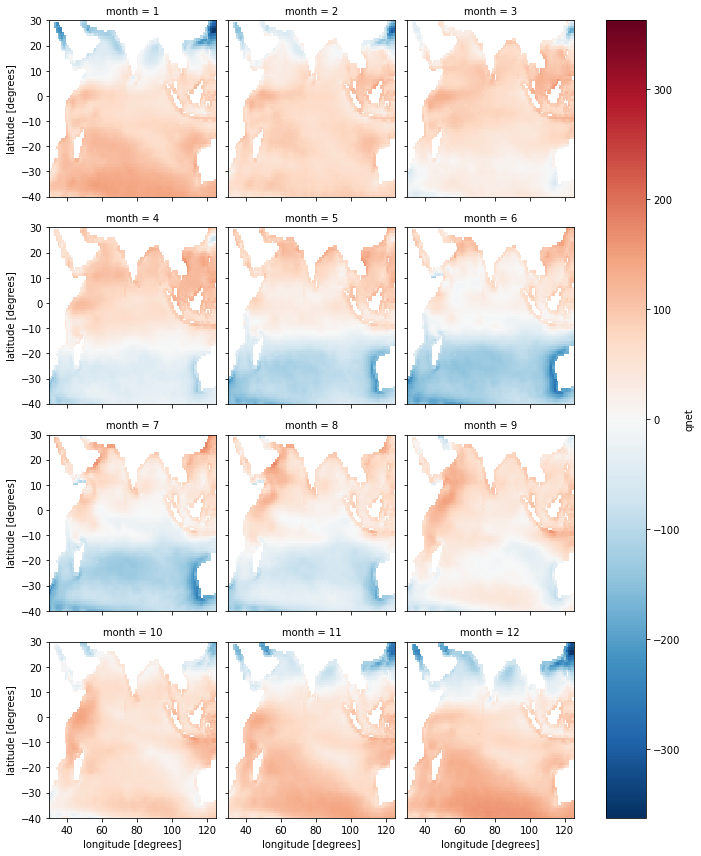

In [6]:
qnet.plot(col = 'month', col_wrap = 3)

In [7]:
DS2 = xr.open_dataset('/home/z5113258/Documents/data/ERA5/ERA5_new.nc', chunks=496)

In [8]:
lh = DS2.mslhf[:,0]

In [9]:
sh = DS2.msshf[:,0]

In [10]:
sw = DS2.msnswrf[:,0]

In [11]:
lw = DS2.msnlwrf[:,0]

In [22]:
q = sw+lw+lh+sh

In [27]:
lw

<xarray.DataArray 'msnlwrf' (time: 496, lat: 180, lon: 360)>
dask.array<getitem, shape=(496, 180, 360), dtype=float32, chunksize=(496, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-04-01
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    expver   float64 1.0
Attributes:
    long_name:  Mean surface net long-wave radiation flux
    units:      W m**-2

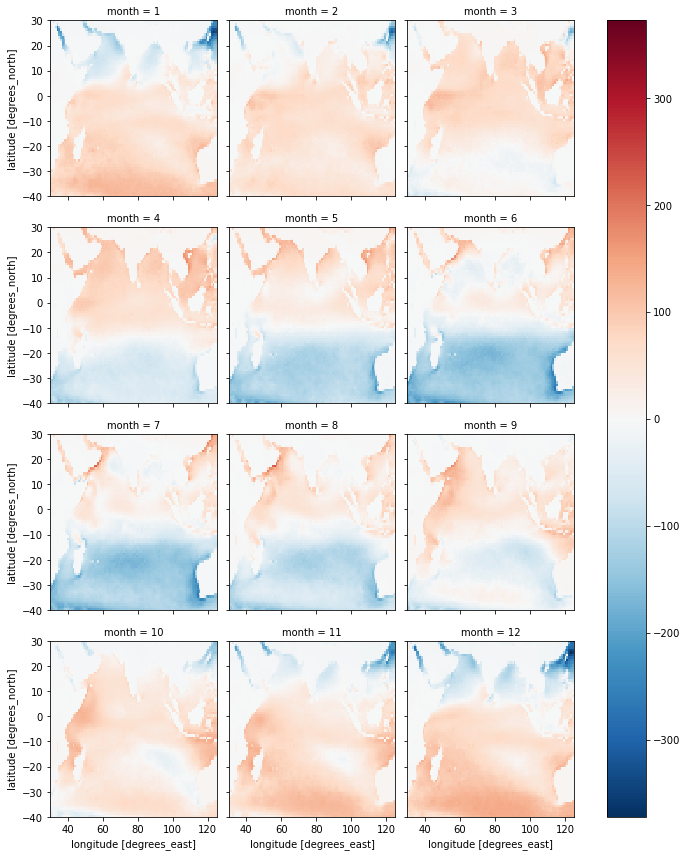

In [23]:
q.sel(lat=slice(-40,30),lon=slice(30,125)).groupby('time.month').mean('time').plot(col='month',col_wrap = 3)

In [91]:
q_ERA5 = q.sel(lat=slice(-40,30),lon=slice(30,125)).groupby('time.month').mean('time')

In [92]:
q_ERA5.to_netcdf('/home/z5113258/Documents/data/ERA5/ERA5_qnet.nc')

In [28]:
OSST = xr.open_mfdataset('/home/z5113258/Documents/data/NOAA_OISSTv2.nc', parallel=True).sst
LSM = xr.open_dataset('/home/z5113258/Documents/data/LSM.nc').mask
OSST= OSST.where(LSM[0]).sel(lat=slice(-40,30),lon=slice(30,125))
OSST = OSST.groupby('time.month').mean('time')

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


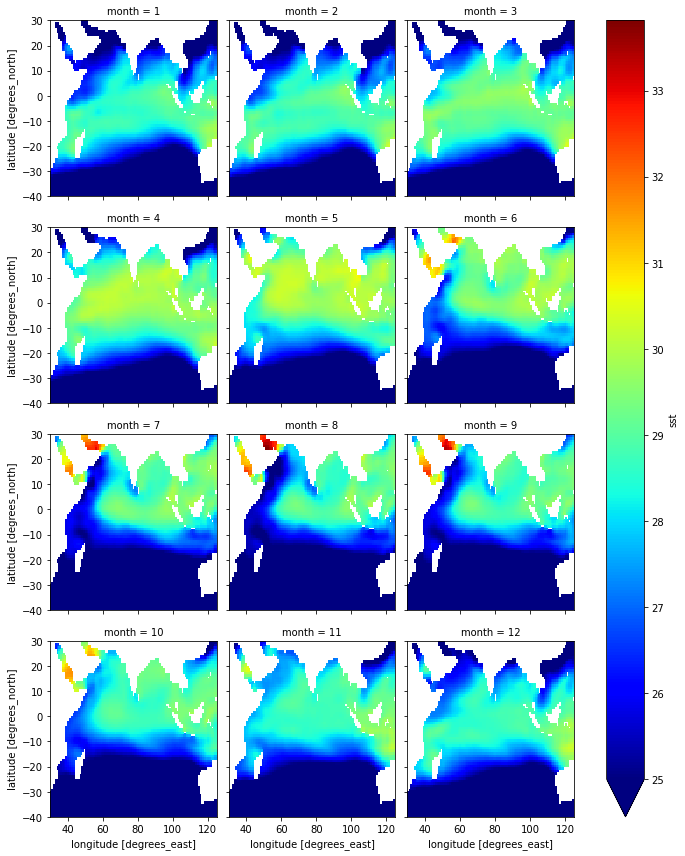

In [34]:
OSST.plot(col='month', col_wrap = 3, cmap = 'jet', vmin = 25)